# K-Fold Cross Validation

## We'll work with the Iris data set:

In [3]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()


A single train/test split is made easy with the train_test_split function in the cross_validation library:

In [4]:
# Split the iris data into train/test data sets with 40% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# Build an SVC model for predicting iris classifications using training data
clf = svm.SVC(kernel='linear').fit(X_train, y_train)

# Now measure its performance(accuracy) with the test data
clf.score(X_test, y_test)   

0.9666666666666667

K-Fold cross validation is just as easy; let's use a K of 5:

In [5]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(clf, iris.data, iris.target, cv=5)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())

[0.96666667 1.         0.96666667 0.96666667 1.        ]
0.9800000000000001


Our model is even better than we thought! Can we do better? Let's try a different kernel (poly):

In [6]:
clf = svm.SVC(kernel='poly')
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
print(scores)
print(scores.mean())

[0.96666667 1.         0.96666667 0.96666667 1.        ]
0.9800000000000001


what conclusions can you draw from the results?

In [8]:
# Build an SVC model for predicting iris classifications using training data
clf = svm.SVC(kernel='poly').fit(X_train, y_train)

# Now measure its performance with the test data
clf.score(X_test, y_test)   

0.9

PS: 
- Check out https://scikit-learn.org/stable/modules/cross_validation.html  for more details about Cross-Validation
- and http://eric.univ-lyon2.fr/~ricco/cours/slides/svm.pdf for details about Support Vector Classifier/ Machine (SVC/SVM)

## Activity

The "poly" kernel for SVC actually has another attribute for the number of degrees of the polynomial used, which defaults to 3. For example, svm.SVC(kernel='poly', degree=3)

We think the default third-degree polynomial is overfitting, based on the results above. But how about 2? Give that a try and compare it to the linear kernel.

In [12]:
#trying with the 2nd degree polynomial

clf = svm.SVC(kernel='poly', degree=2)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
print(scores)
print(scores.mean())

# Build an SVC model for predicting iris classifications using training data
clf = svm.SVC(kernel='poly', degree=2).fit(X_train, y_train)

# Now measure its performance with the test data
clf.score(X_test, y_test)



[0.96666667 1.         1.         0.96666667 1.        ]
0.9866666666666667


0.95

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%


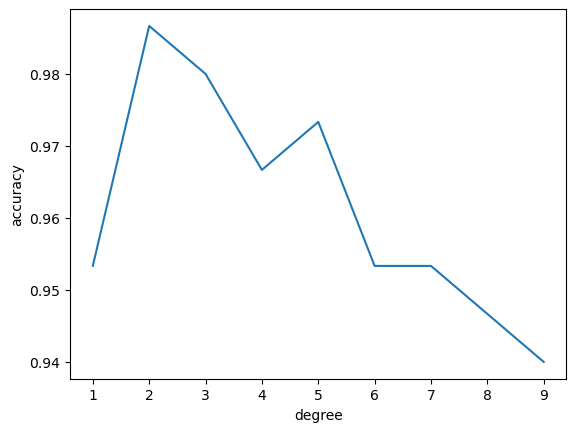

Best degree: 2


In [19]:
#plotting degree vs accuracy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

degrees = np.arange(1, 10)
scores = []

for degree in degrees:
    clf = svm.SVC(kernel='poly', degree=degree)
    scores.append(cross_val_score(clf, iris.data, iris.target, cv=5).mean())
    print(f'{(degree/10)*100}%')



plt.plot(degrees, scores)
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.show()

#find the best degree
best_degree = degrees[scores.index(max(scores))]
print(f'Best degree: {best_degree}')



